In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('fifa_56rows.csv')

/Users/cnieto/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Unnamed: 0,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,mentality_vision,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_handling,cam,cdm,gk,work_rate_attacking,work_rate_deffensive
0,0,158023,L. Messi,93,93,78000000.0,320000.0,34,1987-06-24,170,...,95,75,96,24,11,93,64,19,2,1
1,1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,1988-08-21,185,...,81,90,88,19,6,86,66,19,3,2
2,2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,1985-02-05,187,...,76,88,95,24,11,86,59,20,3,1
3,3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,1992-02-05,175,...,90,93,93,29,9,89,63,20,3,2
4,4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,1991-06-28,181,...,94,83,89,53,13,89,80,21,3,3


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.set_index('sofifa_id',drop=True, inplace=True)

In [6]:
df.head()

,short_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_name,...,mentality_vision,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_handling,cam,cdm,gk,work_rate_attacking,work_rate_deffensive
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,93,93,78000000.0,320000.0,34,1987-06-24,170,72,Paris Saint-Germain,...,95,75,96,24,11,93,64,19,2,1
188545,R. Lewandowski,92,92,119500000.0,270000.0,32,1988-08-21,185,81,FC Bayern München,...,81,90,88,19,6,86,66,19,3,2
20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,1985-02-05,187,83,Manchester United,...,76,88,95,24,11,86,59,20,3,1
190871,Neymar Jr,91,91,129000000.0,270000.0,29,1992-02-05,175,68,Paris Saint-Germain,...,90,93,93,29,9,89,63,20,3,2
192985,K. De Bruyne,91,91,125500000.0,350000.0,30,1991-06-28,181,70,Manchester City,...,94,83,89,53,13,89,80,21,3,3


In [7]:
### IMPORTING SPECIAL LIBRARIES AND INSTALLING THEM IF NECESSARY
try:
    import pyforest
except:
    !pip install pyforest
    import pyforest

try:
    from lazypredict.Supervised import LazyRegressor
except:
    !pip install lazypredict
    !brew install libomp
    

/Users/cnieto/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
# Importing important libraries
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix
# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
# Hide warnings
import warnings
warnings.filterwarnings('ignore')
# Setting up max columns displayed to 100
pd.options.display.max_columns = 100


In [9]:
# Creating train test split with top 5 features
X = df[['overall', 'potential', 'international_reputation',
       'attacking_short_passing', 'skill_long_passing',
       'movement_reactions', 'power_shot_power', 'mentality_vision',
       'mentality_composure', 'cam']]
y = df.wage_eur
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,test_size=0.25)

<IPython.core.display.Javascript object>

In [10]:
# Creating second train with top 5 features
X_5 = df[['overall', 'potential', 'international_reputation',
       'attacking_short_passing', 'skill_long_passing'
       ]]
y_5 = df.wage_eur
# Call train_test_split on the data and capture the results
X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X_5, y_5, random_state=3,test_size=0.25)

<IPython.core.display.Javascript object>

#### The Code is ran in Visual studio instead 

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [12]:
regressors = [
    HistGradientBoostingRegressor(random_state=0), 
    GradientBoostingRegressor(), 
    LGBMRegressor(),
    PoissonRegressor()
    #RandomForestRegressor()
]

In [13]:
# parameter grids for the various regressors
HistRegress_parameters = {
    'regressor__loss' : ['least_squares', 'least_absolute_deviation', 'poisson'],
    'regressor__max_iter' : [10,100,1000],
    'regressor__max_leaf_nodes':[21,31,41]
}
GradientRegress_parameters = {
    'regressor__loss' : ['ls', 'lad', 'huber', 'quantile'],
    'regressor__n_estimators' : [100,150,250]
}
LgbtRegress_parameters = {
    'regressor__boosting_type': ['gbdt','dart','goss'],
    'regressor__num_leaves' : [21,31,41]
}
PoissonRegress_parameters = {
    'regressor__alpha': [1,0.5,0.1,1.5,0.7],
    'regressor__max_iter' : [10,100,1000,2000]
}
#RForestRegress_parameters = {
#    'regressor__n_estimators': [10,100,1000],
#    'regressor__criterion' : ['mse','mae']
#}

In [14]:
# stores all the parameters in a list 
parameters = [
    HistRegress_parameters,
    GradientRegress_parameters,
    LgbtRegress_parameters,
    PoissonRegress_parameters
    #RForestRegress_parameters

]

In [15]:
estimators = []

In [16]:
from sklearn.pipeline import Pipeline

#### The Code is ran in Visual studio instead 

In [17]:
help(GradientBoostingRegressor)

Help on class GradientBoostingRegressor in module sklearn.ensemble._gb:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |

In [18]:
### Clustering

In [19]:
df_cl = df.copy()

In [20]:
from sklearn.cluster import KMeans

In [21]:
cluster = KMeans(4)

In [22]:
cluster.fit(df_cl[['overall', 'potential', 'international_reputation',
       'attacking_short_passing', 'skill_long_passing',
       'movement_reactions', 'power_shot_power', 'mentality_vision',
       'mentality_composure', 'cam','value_eur','wage_eur']])

KMeans(n_clusters=4)

In [23]:
df_cl['KMeans_label'] = cluster.predict(df_cl[['overall', 'potential', 'international_reputation',
       'attacking_short_passing', 'skill_long_passing',
       'movement_reactions', 'power_shot_power', 'mentality_vision',
       'mentality_composure', 'cam','value_eur','wage_eur']])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='wage_eur', ylabel='value_eur'>

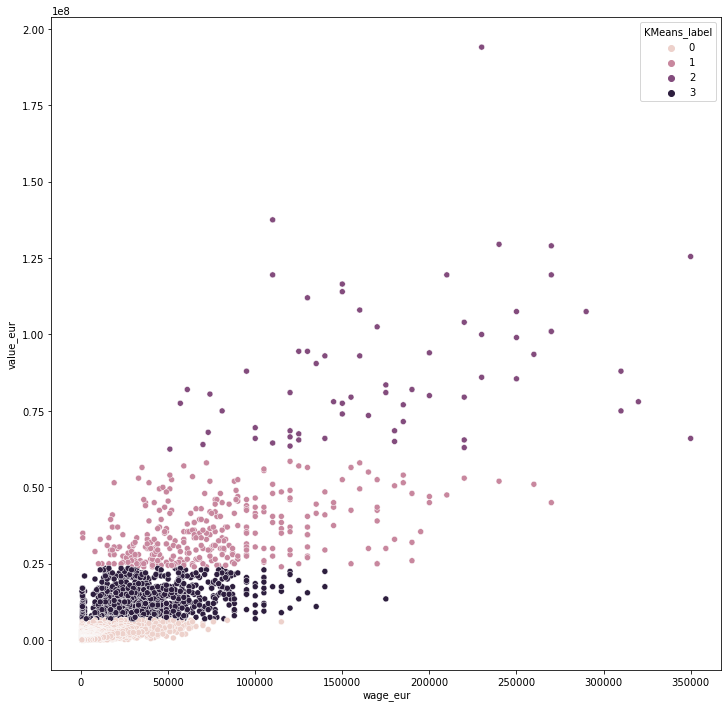

In [24]:
plt.rcParams['figure.figsize'] = (12,12)
sns.scatterplot(x=df_cl.wage_eur,y=df_cl.value_eur,hue=df_cl.KMeans_label)

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

In [27]:
dbcluster = DBSCAN(min_samples=2,eps=0.8)

In [28]:
dbcluster.fit(df_cl[['overall', 'potential', 'international_reputation',
       'attacking_short_passing', 'skill_long_passing',
       'movement_reactions', 'power_shot_power', 'mentality_vision',
       'mentality_composure', 'cam','value_eur','wage_eur']])

DBSCAN(eps=0.8, min_samples=2)

In [29]:
df_cl['DBSCAN_label'] = dbcluster.fit_predict(df_cl[['overall', 'potential', 'international_reputation',
       'attacking_short_passing', 'skill_long_passing',
       'movement_reactions', 'power_shot_power', 'mentality_vision',
       'mentality_composure', 'cam','value_eur','wage_eur']])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='wage_eur', ylabel='value_eur'>

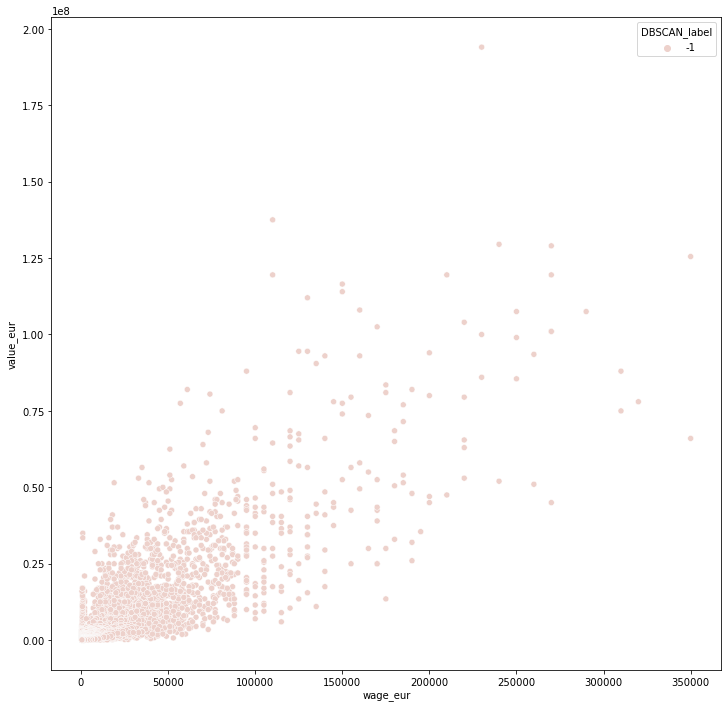

In [30]:
plt.rcParams['figure.figsize'] = (12,12)
sns.scatterplot(x=df_cl.wage_eur,y=df_cl.value_eur,hue=df_cl.DBSCAN_label)

In [31]:
from sklearn.cluster import SpectralBiclustering

In [32]:
SBcluster = SpectralBiclustering(n_clusters=4)

In [33]:
SBcluster.fit(df_cl[['overall', 'potential', 'international_reputation',
       'attacking_short_passing', 'skill_long_passing',
       'movement_reactions', 'power_shot_power', 'mentality_vision',
       'mentality_composure', 'cam','value_eur','wage_eur']])

SpectralBiclustering(n_clusters=4)

In [34]:
help(SpectralBiclustering)

Help on class SpectralBiclustering in module sklearn.cluster._bicluster:

class SpectralBiclustering(BaseSpectral)
 |  SpectralBiclustering(n_clusters=3, *, method='bistochastic', n_components=6, n_best=3, svd_method='randomized', n_svd_vecs=None, mini_batch=False, init='k-means++', n_init=10, n_jobs='deprecated', random_state=None)
 |  
 |  Spectral biclustering (Kluger, 2003).
 |  
 |  Partitions rows and columns under the assumption that the data has
 |  an underlying checkerboard structure. For instance, if there are
 |  two row partitions and three column partitions, each row will
 |  belong to three biclusters, and each column will belong to two
 |  biclusters. The outer product of the corresponding row and column
 |  label vectors gives this checkerboard structure.
 |  
 |  Read more in the :ref:`User Guide <spectral_biclustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or tuple (n_row_clusters, n_column_clusters), default=3
 |      The number of row and column

In [35]:
df_cl['SBcluster_label'] = SBcluster.row_labels_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='wage_eur', ylabel='value_eur'>

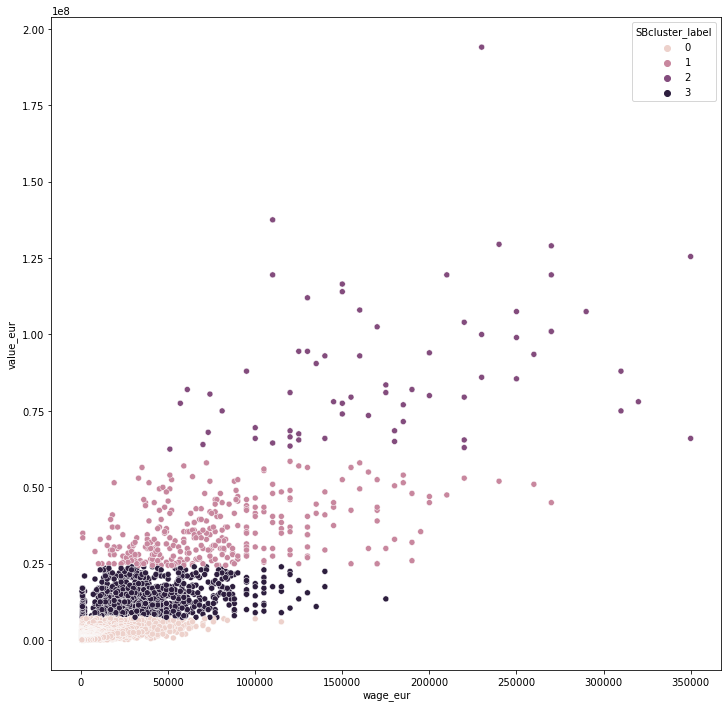

In [36]:
plt.rcParams['figure.figsize'] = (12,12)
sns.scatterplot(x=df_cl.wage_eur,y=df_cl.value_eur,hue=df_cl.SBcluster_label)

### Regression by club

In [37]:
df[df.short_name == 'G. Bale']

,short_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_name,league_name,league_level,club_position,club_loaned_from,club_joined,nationality_name,nation_team_id,nation_position,preferred_foot,weak_foot,skill_moves,international_reputation,pace,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_handling,cam,cdm,gk,work_rate_attacking,work_rate_deffensive
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
173731,G. Bale,82,82,25000000.00,170000.00,31,1989-07-16,185,82,Real Madrid CF,Spain Primera Division,1.00,M,0,2013-09-01,Wales,1367.00,M,0,3,4,4,82.00,70.00,86,84,80,85,91,87,79,83,80,83,78,78,64,90,84,61,76,87,64,53,82,79,76,85,50,15,81,67,18,2,2


In [38]:
Pmodel = PoissonRegressor(alpha = 1.5, max_iter = 1000)

In [39]:
X_5_train

,overall,potential,international_reputation,attacking_short_passing,skill_long_passing
sofifa_id,,,,,
224065,75,76,1,81,69
211365,71,72,1,68,67
263576,58,77,1,31,25
256711,63,70,1,63,58
264207,54,74,1,52,50
...,...,...,...,...,...
175092,68,68,2,64,63
240672,60,70,1,61,58
234883,64,68,1,66,63


In [40]:
Pmodel.fit(X_train, y_train)

PoissonRegressor(alpha=1.5, max_iter=1000)

In [41]:
df.club_name.unique

<bound method Series.unique of sofifa_id
158023    Paris Saint-Germain
188545      FC Bayern München
20801       Manchester United
190871    Paris Saint-Germain
192985        Manchester City
                 ...         
261962               Wuhan FC
262040             Derry City
262760             Finn Harps
262820             Finn Harps
264540    NorthEast United FC
Name: club_name, Length: 19165, dtype: object>

In [42]:
X_Barça = df[df.club_name == 'FC Barcelona'][['overall', 'potential', 'international_reputation',
       'attacking_short_passing', 'skill_long_passing',
       'movement_reactions', 'power_shot_power', 'mentality_vision',
       'mentality_composure', 'cam']] # Real Madrid CF

In [43]:
Barça_pred = Pmodel.predict(X_Barça)

In [44]:
y_Barça = df[df.club_name == 'FC Barcelona']['wage_eur']

In [45]:
y_Barça

sofifa_id
192448   250000.00
153079   260000.00
228702   210000.00
189332   200000.00
189511   200000.00
202556   220000.00
152729   175000.00
231443   165000.00
189242   165000.00
194404   115000.00
220440   145000.00
199564   140000.00
251854    51000.00
205600   125000.00
189805    34000.00
193290   120000.00
245037    71000.00
253163    86000.00
242816    75000.00
251804    67000.00
253004    44000.00
259694    76000.00
237156    44000.00
251873     6000.00
246139    29000.00
229337    35000.00
237823    35000.00
255069    23000.00
242999    33000.00
259065    16000.00
257318    10000.00
263578     1000.00
264240     4000.00
Name: wage_eur, dtype: float64

In [46]:
df.loc[202556]

short_name                                  M. Depay
overall                                           85
potential                                         86
value_eur                                63000000.00
wage_eur                                   220000.00
age                                               27
dob                                       1994-02-13
height_cm                                        176
weight_kg                                         78
club_name                               FC Barcelona
league_name                   Spain Primera Division
league_level                                    1.00
club_position                                      M
club_loaned_from                                   0
club_joined                               2021-07-01
nationality_name                         Netherlands
nation_team_id                             105035.00
nation_position                                    F
preferred_foot                                

In [47]:
Barça_pred

array([239448.89656224, 194648.78637468, 197449.7181831 , 139862.06881664,
       144680.94713304, 127435.96995783, 102391.48431174,  97954.09560888,
        75603.54620859,  52424.63160876,  74164.0927374 ,  57397.70373516,
        72187.13181344,  54702.11764489,  45702.70834447,  30660.72858943,
        35473.67356182,  32857.94167417,  28100.43799785,  29618.16285823,
        33636.61620753,  24512.65409211,   9685.333869  ,  11005.6745759 ,
         6384.13382086,   6977.33190157,   6929.49739303,   7779.13818082,
         6358.98086056,   4532.6434275 ,   5746.7709792 ,   5432.21159979,
         6058.25559793])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

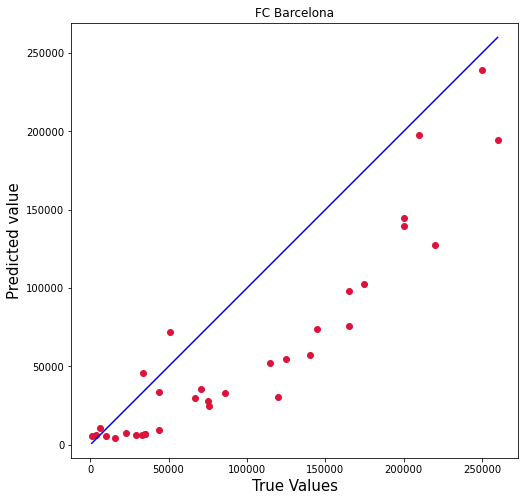

In [48]:
plt.figure(figsize=(8,8))
plt.scatter(y_Barça.values, Barça_pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(Barça_pred), max(y_Barça.values))
p2 = min(min(Barça_pred), min(y_Barça.values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted value', fontsize=15)
plt.title('FC Barcelona')
plt.axis('equal')
plt.show()

In [49]:
X_Madrid = df[df.club_name == 'Real Madrid CF'][['overall', 'potential', 'international_reputation',
       'attacking_short_passing', 'skill_long_passing',
       'movement_reactions', 'power_shot_power', 'mentality_vision',
       'mentality_composure', 'cam']] 

In [50]:
Madrid_pred = Pmodel.predict(X_Madrid)

In [51]:
y_Madrid = df[df.club_name == 'Real Madrid CF']['wage_eur']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

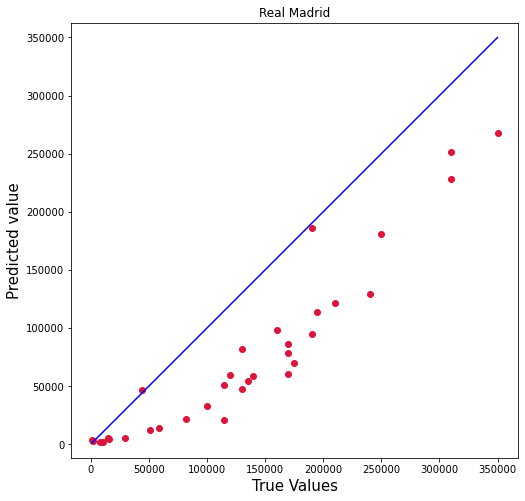

In [52]:
plt.figure(figsize=(8,8))
plt.scatter(y_Madrid.values, Madrid_pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(Madrid_pred), max(y_Madrid.values))
p2 = min(min(Madrid_pred), min(y_Madrid.values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted value', fontsize=15)
plt.axis('equal')
plt.title('Real Madrid')
plt.show()

In [53]:
df_B = pd.DataFrame(y_Barça)

In [54]:
df_B['wage_pred'] = Barça_pred

In [55]:
df_B['player_name'] = df.loc[[192448, 153079, 228702, 189332, 189511, 202556, 152729, 231443,
            189242, 194404, 220440, 199564, 251854, 205600, 189805, 193290,
            245037, 253163, 242816, 251804, 253004, 259694, 237156, 251873,
            246139, 229337, 237823, 255069, 242999, 259065, 257318, 263578,
            264240]]['short_name'].values

In [56]:
df_B['difference'] = df_B.wage_eur - df_B.wage_pred

In [57]:
df_B.head()

,wage_eur,wage_pred,player_name,difference
sofifa_id,,,,
192448,250000.00,239448.90,M. ter Stegen,10551.10
153079,260000.00,194648.79,S. Agüero,65351.21
228702,210000.00,197449.72,F. de Jong,12550.28
189332,200000.00,139862.07,Jordi Alba,60137.93
189511,200000.00,144680.95,Sergio Busquets,55319.05


In [58]:
range(df_B.shape[0])

range(0, 33)

In [59]:
df_B.wage_eur.iloc[0]

250000.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

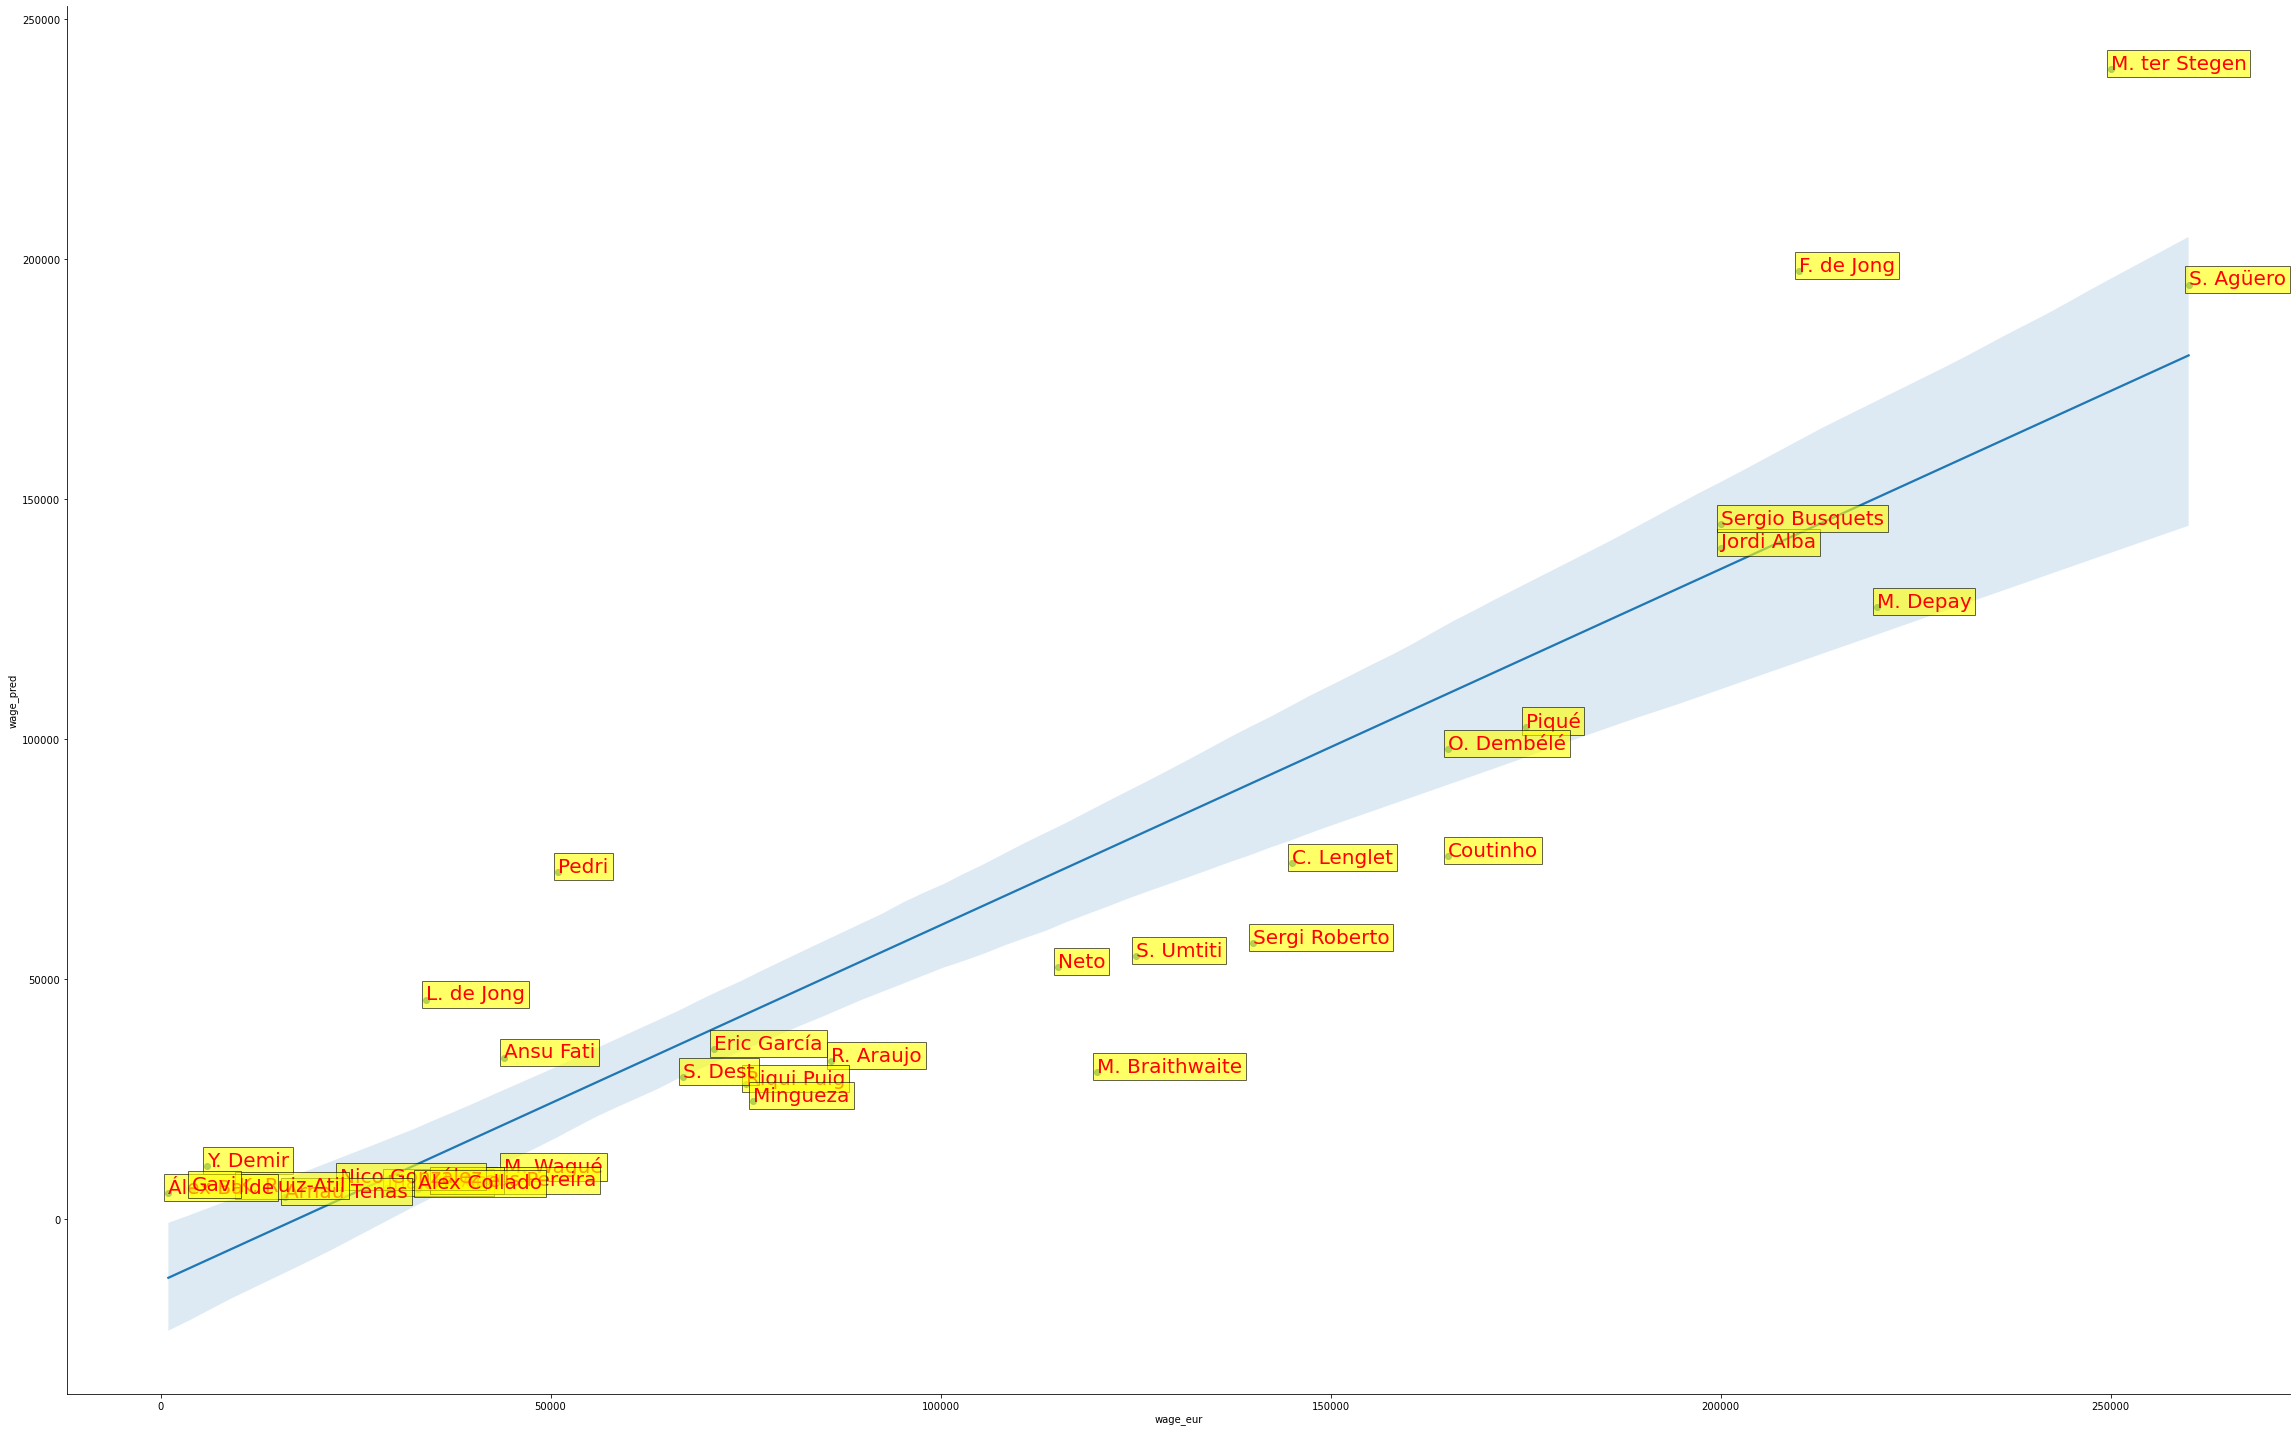

In [60]:
sns.lmplot(data=df_B,x='wage_eur',y='wage_pred',height=20, aspect=1.6)
for i in range(df_B.shape[0]):
    plt.text(x=df_B.wage_eur.iloc[i],y=df_B.wage_pred.iloc[i],s=df_B.player_name.iloc[i], 
    fontdict=dict(color='red',size=20),
    bbox=dict(facecolor='yellow',alpha=0.6))

plt.savefig('Barça_truevspred.png')

In [61]:
df_B

,wage_eur,wage_pred,player_name,difference
sofifa_id,,,,
192448,250000.00,239448.90,M. ter Stegen,10551.10
153079,260000.00,194648.79,S. Agüero,65351.21
228702,210000.00,197449.72,F. de Jong,12550.28
189332,200000.00,139862.07,Jordi Alba,60137.93
189511,200000.00,144680.95,Sergio Busquets,55319.05
202556,220000.00,127435.97,M. Depay,92564.03
152729,175000.00,102391.48,Piqué,72608.52
231443,165000.00,97954.10,O. Dembélé,67045.90
189242,165000.00,75603.55,Coutinho,89396.45


In [62]:
df_M = pd.DataFrame(y_Madrid)

In [63]:
df_M['wage_pred'] = Madrid_pred

In [64]:
X_Madrid.index

Int64Index([165153, 192119, 200145, 182521, 177003, 183277, 204963, 197445,
            220834, 228618, 239053, 173731, 197781, 240130, 200724, 208618,
            176676, 238794, 232432, 243812, 248243, 222509, 221639, 225161,
            243952, 261987, 258922, 261865, 258923, 258185, 264170, 259419,
            259424],
           dtype='int64', name='sofifa_id')

In [65]:
df_M['player_name'] = df.loc[[165153, 192119, 200145, 182521, 177003, 183277, 204963, 197445,
            220834, 228618, 239053, 173731, 197781, 240130, 200724, 208618,
            176676, 238794, 232432, 243812, 248243, 222509, 221639, 225161,
            243952, 261987, 258922, 261865, 258923, 258185, 264170, 259419,
            259424]]['short_name'].values

In [66]:

df_M['difference'] = df_M.wage_eur - df_M.wage_pred

In [67]:
df_M.head()

,wage_eur,wage_pred,player_name,difference
sofifa_id,,,,
165153,350000.00,267676.76,K. Benzema,82323.24
192119,250000.00,180566.58,T. Courtois,69433.42
200145,310000.00,251387.44,Casemiro,58612.56
182521,310000.00,228577.16,T. Kroos,81422.84
177003,190000.00,186267.29,L. Modrić,3732.71


In [68]:
range(df_M.shape[0])

range(0, 33)

In [69]:
df_M.wage_eur.iloc[0]

350000.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

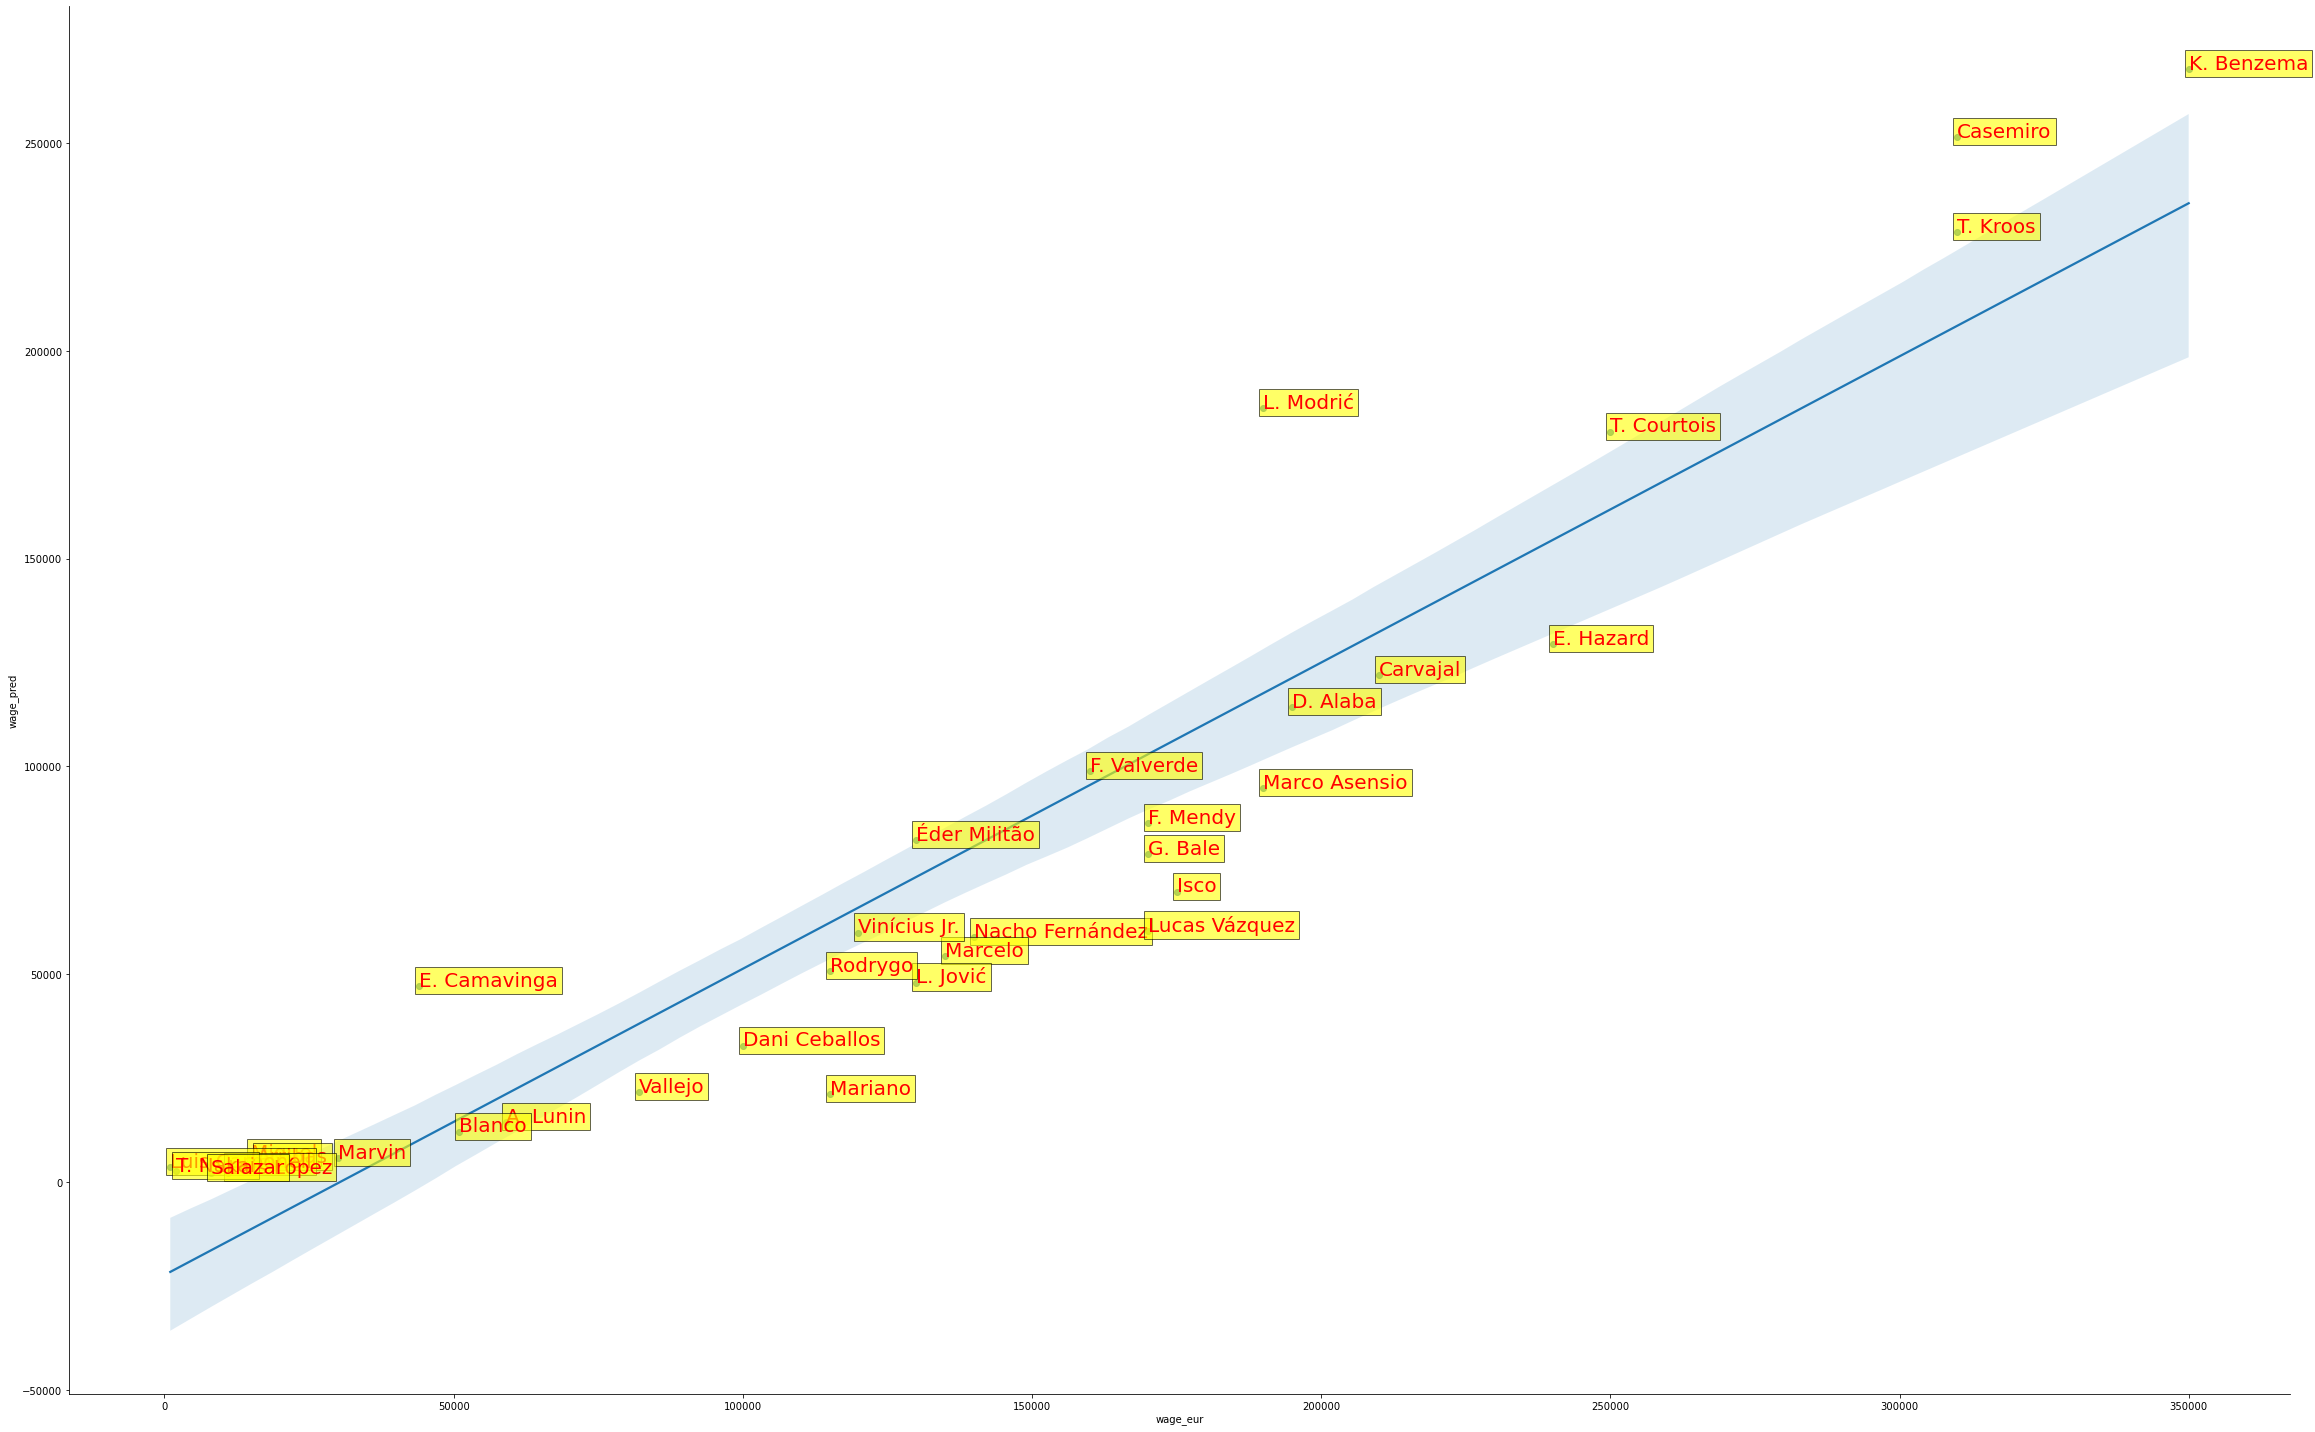

In [70]:
sns.lmplot(data=df_M,x='wage_eur',y='wage_pred',height=20, aspect=1.6)
for i in range(df_M.shape[0]):
    plt.text(x=df_M.wage_eur.iloc[i],y=df_M.wage_pred.iloc[i],s=df_M.player_name.iloc[i], 
    fontdict=dict(color='red',size=20),
    bbox=dict(facecolor='yellow',alpha=0.6))

plt.savefig('Madrid_truevspred.png')

In [71]:
df_M

,wage_eur,wage_pred,player_name,difference
sofifa_id,,,,
165153,350000.00,267676.76,K. Benzema,82323.24
192119,250000.00,180566.58,T. Courtois,69433.42
200145,310000.00,251387.44,Casemiro,58612.56
182521,310000.00,228577.16,T. Kroos,81422.84
177003,190000.00,186267.29,L. Modrić,3732.71
183277,240000.00,129370.38,E. Hazard,110629.62
204963,210000.00,121946.98,Carvajal,88053.02
197445,195000.00,114230.10,D. Alaba,80769.90
220834,190000.00,94887.51,Marco Asensio,95112.49
